In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score

In [2]:
df = pd.read_csv('Proc_Data/production_and_temp.csv', encoding = 'ISO-8859-1')
df.head()

,Area Code,Region,Item,Year,Value(in $),Temp difference
0,2,Afghanistan,"Almonds, with shell",1975,0.0,-0.659875
1,2,Afghanistan,"Anise, badian, fennel, coriander",1975,NaN,-0.659875
2,2,Afghanistan,Apples,1975,27900.0,-0.659875
3,2,Afghanistan,Apricots,1975,59500.0,-0.659875
4,2,Afghanistan,Barley,1975,384000.0,-0.659875


In [3]:
print(df['Region'].unique())
print(df.shape)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize'
 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "CÃ´te d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethiopia PDR' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'French Polyne

In [4]:
drop_countries = ['Occupied Palestinian Territory', 'World', 'Africa',
                  'Eastern Africa', 'Middle Africa', 'Sudan (former)',
                  'Northern Africa', 'Southern Africa', 'Western Africa',
                  'Americas', 'Northern America', 'Central America',
                  'Caribbean', 'South America', 'Asia', 'Central Asia',
                  'Eastern Asia', 'Southern Asia', 'South-Eastern Asia',
                  'Western Asia', 'Europe', 'Eastern Europe', 'South Sudan',
                  'Northern Europe', 'Southern Europe', 'Ethiopia PDR',
                  'Western Europe', 'Oceania' 'Australia & New Zealand',
                  'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
                  'Least Developed Countries', 'Land Locked Developing Countries',
                  'Small Island Developing States', 'Netherlands Antilles (former)',
                  'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries']
for x in drop_countries:
    df.drop(df[df['Region'] == x].index, axis = 0, inplace = True)
print(df.shape)

(589594, 6)


In [5]:
df_country_code=df[['Area Code','Region']]
df_country_code.reset_index(drop=True, inplace=True)
df_country_code

,Area Code,Region
0,2,Afghanistan
1,2,Afghanistan
2,2,Afghanistan
3,2,Afghanistan
4,2,Afghanistan
...,...,...
589589,5501,Australia & New Zealand
589590,5501,Australia & New Zealand
589591,5501,Australia & New Zealand
589592,5501,Australia & New Zealand


In [6]:
drop_crops = ['Crops (PIN)', 'Food (PIN)', 'Livestock (PIN)',
              'Non Food (PIN)', 'Vegetables and Fruit Primary',
             'Agriculture (PIN)']
for x in drop_crops:
    df.drop(df[df['Item'] == x].index, axis = 0, inplace = True)
print(df.shape)

(589594, 6)


In [7]:
df_grouped_summed = df.groupby(['Item','Region']).sum()
df_grouped_summed.drop(columns=['Year'],inplace=True,axis=1)
g = df_grouped_summed['Value(in $)'].groupby(level=0, group_keys=False)
df_top = g.nlargest(10)
print(df_top)

Item              Region     
Agave fibres nes  Colombia       1327079.0
                  Cuba            495761.0
                  Mexico          254588.0
                  El Salvador     244316.0
                  Philippines     181296.0
                                   ...    
Yautia (cocoyam)  El Salvador    1016626.0
                  Costa Rica      444368.0
                  Panama          331375.0
                  Mexico           88202.0
                  Puerto Rico      27672.0
Name: Value(in $), Length: 1718, dtype: float64


In [8]:
print(df.Item.unique())

['Almonds, with shell' 'Anise, badian, fennel, coriander' 'Apples'
 'Apricots' 'Barley' 'Berries nes' 'Cotton lint' 'Cottonseed' 'Figs'
 'Fruit, citrus nes' 'Fruit, fresh nes' 'Fruit, stone nes' 'Grapes'
 'Linseed' 'Maize' 'Melons, other (inc.cantaloupes)' 'Millet' 'Nuts, nes'
 'Olives' 'Oranges' 'Peaches and nectarines' 'Pears' 'Pistachios'
 'Plums and sloes' 'Potatoes' 'Pulses, nes' 'Rice, paddy' 'Seed cotton'
 'Sesame seed' 'Sugar beet' 'Sugar cane' 'Sunflower seed'
 'Vegetables, fresh nes' 'Walnuts, with shell' 'Watermelons' 'Wheat'
 'Cereals (Rice Milled Eqv)' 'Cereals,Total' 'Citrus Fruit,Total'
 'Coarse Grain, Total' 'Fibre Crops Primary' 'Fruit excl Melons,Total'
 'Oilcakes Equivalent' 'Oilcrops Primary' 'Pulses,Total'
 'Roots and Tubers,Total' 'Treenuts,Total' 'Vegetables Primary'
 'Vegetables&Melons, Total' 'Beans, dry' 'Beans, green'
 'Broad beans, horse beans, dry' 'Cabbages and other brassicas'
 'Carrots and turnips' 'Cauliflowers and broccoli' 'Cherries'
 'Cherries, sour'

In [9]:
df_top.to_frame()
x=input("Enter the item: ")
def get_countries(x):
    result = list(df_top.get(key = x).index)
    return result
countries=get_countries(x)
#print(countries)
def get_data(x,countries):
    df_train = pd.DataFrame()
    for country in countries:
        df1 = df.loc[(df['Item'] == x) & (df['Region']==country)]
        df_train=df_train.append(df1,ignore_index=True) 
    return df_train
df_train = get_data(x,countries)
df_train

Enter the item: Apples


,Area Code,Region,Item,Year,Value(in $),Temp difference
0,351,China,Apples,1961,167000.0,0.290125
1,351,China,Apples,1962,225000.0,-0.073062
2,351,China,Apples,1963,248000.0,0.266062
3,351,China,Apples,1964,300000.0,-0.035313
4,351,China,Apples,1965,318000.0,0.026375
...,...,...,...,...,...,...
512,102,Iran (Islamic Republic of),Apples,2010,1662430.0,2.255875
513,102,Iran (Islamic Republic of),Apples,2011,1842972.0,0.934250
514,102,Iran (Islamic Republic of),Apples,2012,1900000.0,1.385250
515,102,Iran (Islamic Republic of),Apples,2013,1693370.0,1.867188


In [10]:
print(df_train)
df_train.drop(['Item','Region'], axis = 1, inplace = True)

     Area Code                      Region    Item  Year  Value(in $)  \
0          351                       China  Apples  1961     167000.0   
1          351                       China  Apples  1962     225000.0   
2          351                       China  Apples  1963     248000.0   
3          351                       China  Apples  1964     300000.0   
4          351                       China  Apples  1965     318000.0   
..         ...                         ...     ...   ...          ...   
512        102  Iran (Islamic Republic of)  Apples  2010    1662430.0   
513        102  Iran (Islamic Republic of)  Apples  2011    1842972.0   
514        102  Iran (Islamic Republic of)  Apples  2012    1900000.0   
515        102  Iran (Islamic Republic of)  Apples  2013    1693370.0   
516        102  Iran (Islamic Republic of)  Apples  2014    1572844.0   

     Temp difference  
0           0.290125  
1          -0.073062  
2           0.266062  
3          -0.035313  
4       

In [11]:
pred_indx = ['2015', '2016', '2017', '2018', '2019', '2020']
preds = pd.DataFrame(index = pred_indx, columns = df_train.columns[1:10])
pred_indx = pd.DataFrame(pred_indx)

In [12]:
print(df_train)
X=df_train.drop(columns = ['Value(in $)'], axis = 1)
y=df_train['Value(in $)']

     Area Code  Year  Value(in $)  Temp difference
0          351  1961     167000.0         0.290125
1          351  1962     225000.0        -0.073062
2          351  1963     248000.0         0.266062
3          351  1964     300000.0        -0.035313
4          351  1965     318000.0         0.026375
..         ...   ...          ...              ...
512        102  2010    1662430.0         2.255875
513        102  2011    1842972.0         0.934250
514        102  2012    1900000.0         1.385250
515        102  2013    1693370.0         1.867188
516        102  2014    1572844.0         1.212312

[517 rows x 4 columns]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_t=lm.predict(X_train)
print(r2_score(y_train, y_pred_t))

0.20370937664670885


Training: [0.4582668684076624, 0.775994864986306, 0.8847741902808804, 0.9470575058593959, 0.9758308598995865, 0.9257394005591165, 0.9765852791907149, 0.9600394492716862, 0.9847471426712232, 0.9770466125276058, 0.9701944578209993, 0.9645253359067846, 0.9640750601612729]
Test: [0.06464405948648244, 0.5043831848726782, 0.6602007485004954, 0.8517172317968262, 0.9107506156673714, 0.7296727972477124, 0.8926679177904604, 0.8965762958793352, 0.9207425096447013, 0.8927661085448377, 0.9339094908652729, 0.9215786036140554, 0.9210404707290565]


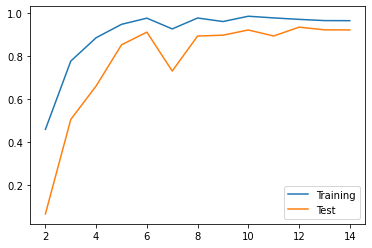

In [14]:
avg=[]
avg_t=[]
num=[]
for i in range(2,15):
    num.append(i)
    r_net=0
    r_net_t=0
    lm = LinearRegression()
    poly_reg=PolynomialFeatures(degree=i)
    poly_X=poly_reg.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,random_state=42)
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t=r2_score(y_train, y_pred_t)
    avg_t.append(r_net_t)
    y_pred=lm.predict(X_test)
    r_net=r2_score(y_test, y_pred)
    avg.append(r_net)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()

In [26]:
total=0
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-56333689179362.69


In [30]:
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)
y_pred_t=ridge.predict(X_train)
r_net_t=r2_score(y_train, y_pred_t)
print('Train: ',r_net_t)
y_pred=ridge.predict(X_test)
r_net=r2_score(y_test, y_pred)
print('Test: ',r_net)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train:  0.836433198449592
Test:  0.5811142936058282


In [33]:
lasso = Lasso(alpha = 20, max_iter = 1000000)
lasso.fit(X_train, y_train)
y_pred_t=lasso.predict(X_train)
r_net_t=r2_score(y_train, y_pred_t)
print('Train: ',r_net_t)
y_pred=lasso.predict(X_test)
r_net=r2_score(y_test, y_pred)
print('Test: ',r_net)

Train:  0.9298792717800642
Test:  0.3004261243787484


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709866132008719.9, tolerance: 2021494025107.093
  positive)


In [24]:
def get_country_code(x):
    df_country_code
    #country = df_country_code(['Region']==x)
    country = df_country_code[(df_country_code['Region'] == x)] 
    return country.iloc[0,0]
get_country_code('Afghanistan')



2